In [1]:
%matplotlib inline

from statsbombpy import sb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import os
from mplsoccer.pitch import Pitch

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from mplsoccer.utils import FontManager
import seaborn as sns
from matplotlib.colors import to_rgba, LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects

from PIL import Image

from urllib.request import urlopen, urlretrieve
from highlight_text import HighlightText, ax_text, fig_text
import requests
from io import BytesIO
import cmasher as cmr

In [2]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-02-12T16:13:49.294747,2021-06-13T16:17:31.694,None,2022-02-12T16:13:49.294747


In [3]:
sb.matches(competition_id=55, season_id=43)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3795220,2021-07-06,21:00:00.000,Europe - UEFA Euro,2020,Italy,Spain,1,1,available,...,2022-08-04T12:00,6,Semi-finals,Wembley Stadium,Felix Brych,Roberto Mancini,Luis Enrique Martínez García,1.1.0,2,2
1,3788769,2021-06-21,21:00:00.000,Europe - UEFA Euro,2020,Russia,Denmark,1,4,available,...,2022-08-04T12:00,3,Group Stage,Parken,Clément Turpin,Stanislav Cherchesov,Kasper Hjulmand,1.1.0,2,2
2,3788761,2021-06-18,15:00:00.000,Europe - UEFA Euro,2020,Sweden,Slovakia,1,0,available,...,2022-08-04T12:00,2,Group Stage,Saint-Petersburg Stadium,Daniel Siebert,Jan Olof Andersson,Štefan Tarkovič,1.1.0,2,2
3,3788766,2021-06-20,18:00:00.000,Europe - UEFA Euro,2020,Italy,Wales,1,0,available,...,2022-08-04T12:00,3,Group Stage,Estadio Olímpico,Ovidiu Alin Hațegan,,,1.1.0,2,2
4,3788764,2021-06-19,18:00:00.000,Europe - UEFA Euro,2020,Portugal,Germany,2,4,available,...,2022-08-04T12:00,2,Group Stage,Allianz Arena,Anthony Taylor,Fernando Manuel Fernandes da Costa Santos,Joachim Löw,1.1.0,2,2
5,3788773,2021-06-23,21:00:00.000,Europe - UEFA Euro,2020,Portugal,France,2,2,available,...,2022-08-04T12:00,3,Group Stage,Puskás Aréna,Antonio Miguel Mateu Lahoz,Fernando Manuel Fernandes da Costa Santos,Didier Deschamps,1.1.0,2,2
6,3788755,2021-06-16,18:00:00.000,Europe - UEFA Euro,2020,Turkey,Wales,0,2,available,...,2022-08-04T12:00,2,Group Stage,Bakı Olimpiya Stadionu,Artur Manuel Ribeiro Soares Dias,,,1.1.0,2,2
7,3788754,2021-06-16,21:00:00.000,Europe - UEFA Euro,2020,Italy,Switzerland,3,0,available,...,2022-08-04T12:00,2,Group Stage,Estadio Olímpico,Sergey Karasev,Roberto Mancini,Vladimir Petković,1.1.0,2,2
8,3788762,2021-06-19,21:00:00.000,Europe - UEFA Euro,2020,Spain,Poland,1,1,available,...,2022-08-04T12:00,2,Group Stage,Estadio de La Cartuja,Daniele Orsato,Luis Enrique Martínez García,Paulo Manuel Carvalho de Sousa,1.1.0,2,2
9,3788760,2021-06-18,18:00:00.000,Europe - UEFA Euro,2020,Croatia,Czech Republic,1,1,available,...,2022-08-04T12:00,2,Group Stage,Hampden Park,Carlos del Cerro Grande,Zlatko Dalić,Jaroslav Šilhavý,1.1.0,2,2


In [2]:
parser = Sbopen()
match_files = [3788769]
df = pd.concat([parser.event(file)[0] for file in match_files])

In [5]:
sb.lineups(match_id=3788769)

{'Denmark':     player_id                     player_name     player_nickname  \
 0        3027   Mathias Jattah-Njie Jørgensen               Zanka   
 1        3322                     Jonas Lössl                None   
 2        3570           Pierre-Emile Højbjerg                None   
 3        3815               Kasper Schmeichel                None   
 4        3959             Andreas Christensen                None   
 5        4447  Martin Braithwaite Christensen  Martin Braithwaite   
 6        5524             Jens Stryger Larsen                None   
 7        5527                  Thomas Delaney                None   
 8        5534               Simon Thorup Kjær          Simon Kjær   
 9        5536           Yussuf Yurary Poulsen      Yussuf Poulsen   
 10       5732         Andreas Evald Cornelius   Andreas Cornelius   
 11       6302                  Kasper Dolberg                None   
 12       6797                     Daniel Wass                None   
 13      

In [3]:
pitchColor = "#7FB069"
figColor = "#7FB069"
linesColor = "black"
hteamColor = "#E32219"
secondColor = "#FFFFFF"
ateamColor = "#D52B1E"
MVP_id = 5527
MVPname = "Thomas Delaney"
tournament = "EURO 2020"
textColor = "black"
hteam = "Denmark"
ateam = "Russia"

pitchCmap = LinearSegmentedColormap.from_list("pitch heatmap", ["#7FB069",hteamColor], N=100)

In [4]:
Statsbomb = Image.open(r"C:\Users\Gusse\OneDrive\Dokumenter\Python\Womens Euro 2022\sb_text_logo.png")

In [5]:
URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/roboto/Roboto%5Bwdth,wght%5D.ttf'
URL2 = 'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf'
robotto_regular = FontManager(URL)
robboto_bold = FontManager(URL2)

In [6]:
shots = df[df.type_name == "Shot"]
shots = shots[shots.team_name == hteam]

shots = shots[['team_name', 'player_name', 'minute', 'second',"x","y", 'shot_statsbomb_xg', 'outcome_name', "type_name", "id"]]


goals = shots[shots.outcome_name == 'Goal']

In [7]:
passes = df[df.type_name == "Pass"]
passes = passes[passes.team_name == hteam]
passes = passes[(passes["type_name"]!="Kick Off") & (passes["type_name"]!="Goal Kick") 
                    & (passes["type_name"]!="Free Kick") & (passes["type_name"]!="Throw-in") 
                    & (passes["type_name"]!="Corner") & (passes["outcome_name"]!="Incomplete") 
                    & (passes["outcome_name"]!='Pass Offside') & (passes["outcome_name"]!="Out") 
                    & (passes["outcome_name"]!="Unknown") & (passes["outcome_name"]!="Injury Clearance")]

passes = passes[['team_name', 'player_name', "player_id", 'minute', 'second', 'x',"y", "type_name", "outcome_name",
                     "end_x","end_y","pass_goal_assist", "type_name"]]
passes = passes.reset_index()

In [8]:
passes['beginning'] = np.sqrt(np.square(120-passes['x']) + np.square(40 -passes['y']))
passes['end'] = np.sqrt(np.square(120 - passes['end_x']) + np.square(40 - passes['end_y']))

passes['progressive'] = [(passes['end'][x]) / (passes['beginning'][x]) < .75 for x in range(len(passes.beginning))]

In [9]:
mvpPasses = df[df["player_id"]== MVP_id]
mvpPasses = mvpPasses[mvpPasses["type_name"]== "Pass"]
mvpPasses = mvpPasses[(mvpPasses["type_name"]!="Kick Off") & (mvpPasses["type_name"]!="Goal Kick") 
                    & (mvpPasses["type_name"]!="Free Kick") & (mvpPasses["type_name"]!="Throw-in") 
                    & (mvpPasses["type_name"]!="Corner") & (mvpPasses["outcome_name"]!="Incomplete") 
                    & (mvpPasses["outcome_name"]!="Pass Offisde") & (mvpPasses["outcome_name"]!="Out") 
                    & (mvpPasses["outcome_name"]!="Unknown")]
mvpPasses = mvpPasses[['team_name', 'player_name', "player_id", 'minute', 'second', 'x',"y", "outcome_name",
                     "end_x","end_y", "type_name", "pass_goal_assist"]]
mvpPasses = mvpPasses.reset_index()

mvpPasses['beginning'] = np.sqrt(np.square(120-mvpPasses['x']) + np.square(40 -mvpPasses['y']))
mvpPasses['end'] = np.sqrt(np.square(120 - mvpPasses['end_x']) + np.square(40 - mvpPasses['end_y']))

mvpPasses['progressive'] = [(mvpPasses['end'][x]) / (mvpPasses['beginning'][x]) < .75 for x in range(len(mvpPasses.beginning))]

mvpPropgPasses = mvpPasses[mvpPasses["progressive"]==True]

assist = mvpPasses[mvpPasses["pass_goal_assist"]==True]

countMvpPasses = mvpPasses.shape[0]
countMVPProg = mvpPropgPasses.shape[0]
countMVPAssist = assist.shape[0]

In [10]:
events = df[df["player_id"]== MVP_id]
events = events[(events["type_name"]!= 'Ball Receipt') & (events["type_name"]!= 'Injury Stoppage') 
                            & (events["type_name"]!= 'Player Off') & (events["type_name"]!= 'Player On') 
                            & (events["type_name"]!= 'Substitution') & (events["type_name"]!= 'Miscontrol')
                      & (events["type_name"]!= 'Shot') & (events["type_name"]!= 'Dispossessed')]
events = events[(events["outcome_name"]!="Incomplete") & (events["outcome_name"]!="Blocked") 
                      & (events["outcome_name"]!="Out") 
                    & (events["outcome_name"]!="Lost Out") & (events["outcome_name"]!="Lost In Play") 
                & (events["outcome_name"]!="Unknown") & (events["outcome_name"]!="Pass Offside")]

events = events[[ 'player_name',"player_id", 'minute', 'second', 'x',"y", "type_name", 
                             "outcome_name"]]



BallRecovery = events[events.type_name == 'Ball Recovery']

Interception = events[events.type_name == 'Interception']


Dribble = events[events.type_name == 'Dribble']
Dribble = Dribble[Dribble.outcome_name == 'Complete']

Tackle = events[events.type_name == "Tackle"]

Clearance = events[events.type_name == "Clearance"]

Block = events[events.type_name == "Block"]

Carry = events[events.type_name == "Carry"]

Pressure = events[events.type_name == "Pressure"]

Duel = events[events.type_name == "Duel"]
Duel = Duel[Duel['outcome_name'].notna()]

countBallRecovery = BallRecovery.shape[0]
countInterception = Interception.shape[0]
countDribble = Dribble.shape[0]
countClearance = Clearance.shape[0]
countBlock = Block.shape[0]
countCarry = Carry.shape[0]
countPressure = Pressure.shape[0]
countDuel = Duel.shape[0]
countClearance = Clearance.shape[0]

In [11]:
passes["passer"] = passes["player_id"]
passes["recipient"] = passes["player_id"].shift(-1)

In [12]:
average_locations = passes.groupby("passer").agg({"x":["mean"], "y": ["mean", "count"]})
average_locations.columns = ["x","y", "count", ]
average_locations.sort_values(by="passer", ascending=True)

mvp_location = average_locations[average_locations.index == MVP_id]

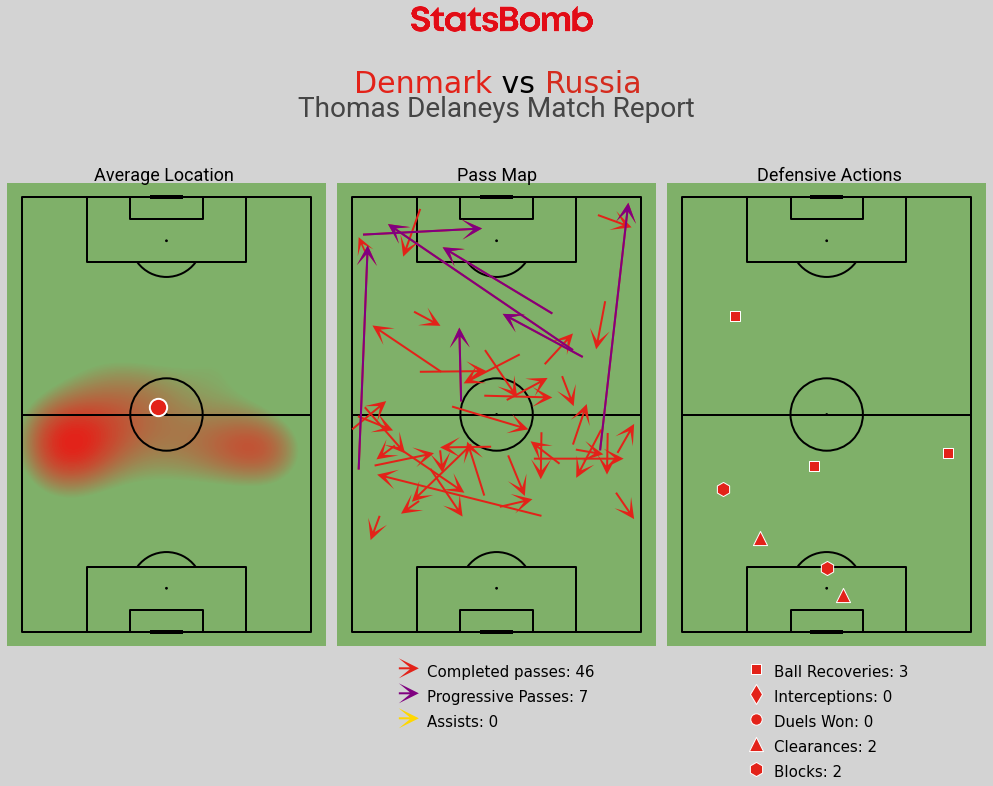

In [14]:
pitch = VerticalPitch(pitch_type='statsbomb',  line_zorder=2, line_color=linesColor, pitch_color=pitchColor)
fig, axs = pitch.grid(ncols=3, axis=False, endnote_height=0.05)
fig.set_facecolor("lightgrey")

axs["title"].text (0.15, 0.01, f"Average Location", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)

axs["title"].text (0.50, 0.01, f"Pass Map", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)

axs["title"].text (0.85, 0.01, f"Defensive Actions", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)


HighlightText(x=.35, y=19,
              s=f'<{hteam}> vs <{ateam}>', fontsize=30,
              highlight_textprops=[{"color": hteamColor},
                                   {"color": ateamColor}])

TITLE_STR1 = f'{MVPname}s Match Report'
title1_text = axs['title'].text(0.5, 0.7, TITLE_STR1, fontsize=28, color="#454545",
                               fontproperties=robotto_regular.prop,
                                ha='center', va='center')


average_location = pitch.scatter(mvp_location.x, mvp_location.y,
                           s=300,
                           marker= "o", color=hteamColor, edgecolors=secondColor, linewidth=2, alpha=1,
                       ax=axs['pitch'][0], zorder=4)

kde = pitch.kdeplot(events.x, events.y, ax=axs['pitch'][0],
                    shade=True, levels=100,
                    shade_lowest=False,
                    cut=4.1, thresh=.5,
                    cmap = pitchCmap)


pitch.arrows(mvpPasses.x, mvpPasses.y,
             mvpPasses.end_x, mvpPasses.end_y, width=2,
             headwidth=10, headlength=10, color=hteamColor, ax=axs['pitch'][1], alpha = 1, 
             zorder= 2, label=f"Completed passes: {countMvpPasses}")

pitch.arrows(mvpPropgPasses.x, mvpPropgPasses.y,
             mvpPropgPasses.end_x, mvpPropgPasses.end_y, width=2,
             headwidth=10, headlength=10, color="purple", ax=axs['pitch'][1], alpha = 1, 
             zorder=2, label=f"Progressive Passes: {countMVPProg}")

pitch.arrows(assist.x, assist.y,
             assist.end_x, assist.end_y, width=2,
             headwidth=10, headlength=10, color="gold", ax=axs['pitch'][1], alpha = 1, 
             zorder=2, label=f"Assists: {countMVPAssist}")


scatter_recovery = pitch.scatter(BallRecovery.x, BallRecovery.y, c= hteamColor, edgecolor = secondColor,
                                 s=120, marker='s',  ax=axs['pitch'][2], zorder=2, 
                                 label=f"Ball Recoveries: {countBallRecovery}")

scatter_interception = pitch.scatter(Interception.x, Interception.y, c= hteamColor,
                                     s=200, marker='d', edgecolor = secondColor, ax=axs['pitch'][2], zorder=2, 
                                     label=f"Interceptions: {countInterception}")


scatter_duel = pitch.scatter(Duel.x, Duel.y, c=hteamColor, edgecolor= secondColor,
                               s=520, marker=".",  ax=axs['pitch'][2], zorder=2, 
                             label= f"Duels Won: {countDuel}")

scatter_Clearance = pitch.scatter(Clearance.x, Clearance.y, c=hteamColor, edgecolor= secondColor,
                               s=200, marker="^",  ax=axs['pitch'][2], zorder=2, 
                             label= f"Clearances: {countClearance}")

scatter_Block = pitch.scatter(Block.x, Block.y, c=hteamColor, edgecolor= secondColor,
                               s=200, marker="h",  ax=axs['pitch'][2], zorder=2, 
                             label= f"Blocks: {countBlock}")




legend = axs['pitch'][1].legend(loc='upper center', facecolor="none", edgecolor="none", labelspacing=1,  bbox_to_anchor=(0.5, -0.01), fancybox=True)
for text in legend.get_texts():
    text.set_fontsize(15)
    text.set_va('center')
    
legend = axs['pitch'][2].legend(loc='upper center', facecolor="none", edgecolor="none", labelspacing=1,  bbox_to_anchor=(0.5, -0.01))
for text in legend.get_texts():
    text.set_fontsize(15)
    text.set_va('center')

sb_logo = fig.add_axes([0.38, 1.04, 0.25, 0.04])
sb_logo.axis('off')
sb_logo.imshow(Statsbomb)


#plt.savefig(f'viz/{MVPname} Match Report vs {ateam}, {tournament}', dpi=300, bbox_inches='tight')